In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [49]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
# dataset = dataset.sample(100000)
dataset.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


# Exploring Data

# Gráfico da distribuição do Salários e Benefícios na Cidade

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


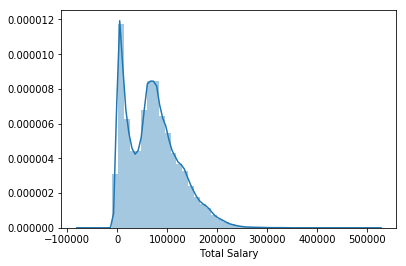

In [3]:
sns.distplot(dataset['Total Salary'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


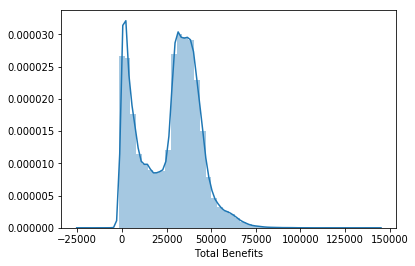

In [4]:
sns.distplot(dataset['Total Benefits'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


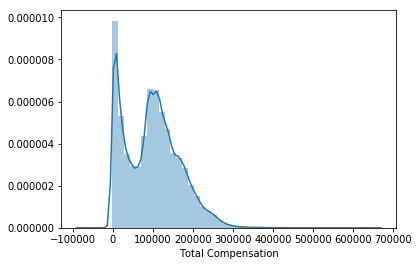

In [5]:
sns.distplot(dataset['Total Compensation'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


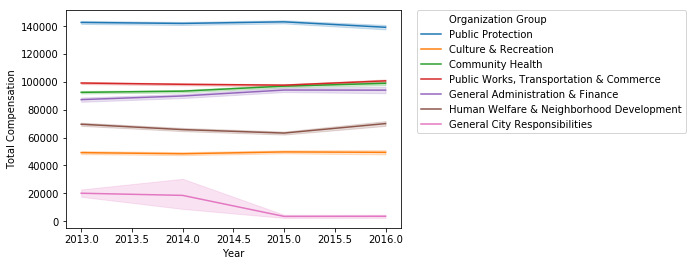

In [8]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Organization Group',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


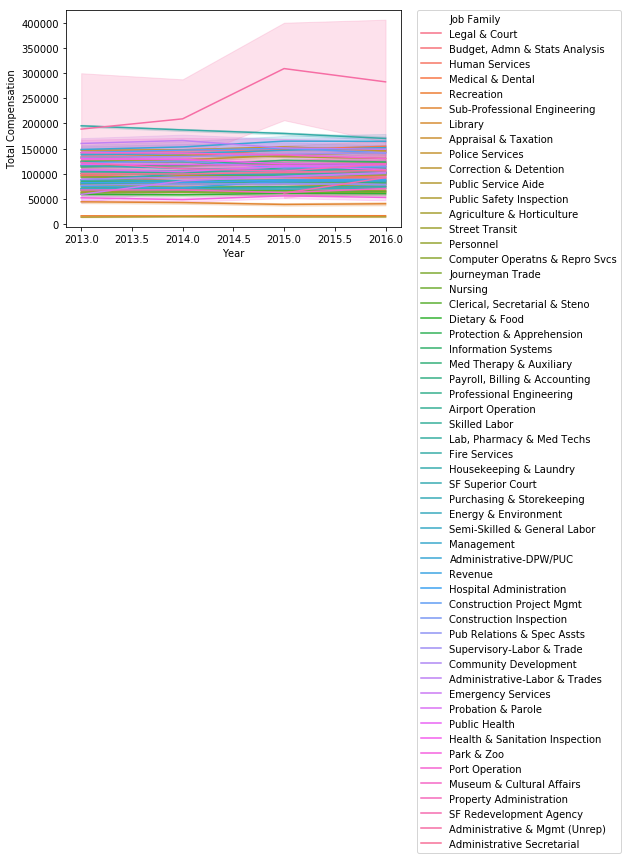

In [9]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Job Family',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

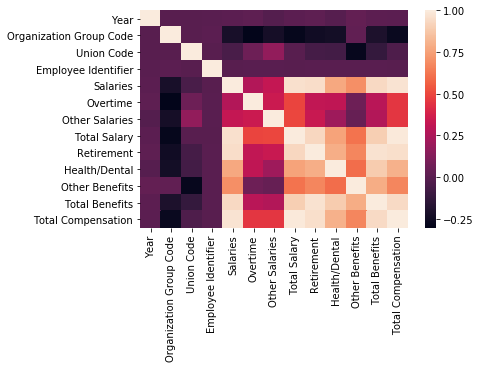

In [10]:
sns.heatmap(dataset.corr())

In [11]:
year_compensation = dataset.groupby(['Year']).mean().reset_index()[['Year','Total Compensation']]
year_compensation

,Year,Total Compensation
0,2013,97872.718129
1,2014,97087.853954
2,2015,97807.731425
3,2016,99658.289452


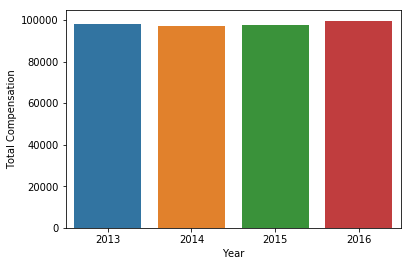

In [12]:
sns.barplot(x='Year', y='Total Compensation', data=year_compensation)

In [13]:
salary_year_organization = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Compensation']]

# Settando Legenda para fora do Plot


Para nunca mais perder: 

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot/34579525


https://matplotlib.org/users/legend_guide.html

# Total Compensation ao longo do Tempo

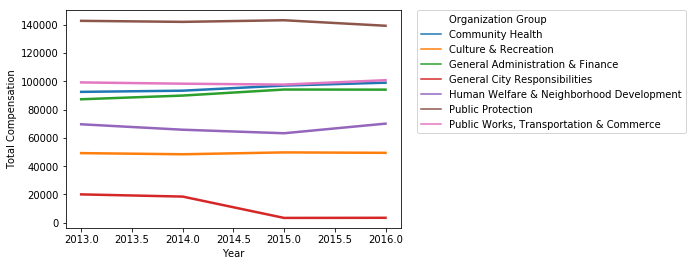

In [14]:
g = sns.lineplot(
    data=salary_year_organization,
    x='Year',
    y='Total Compensation',
    hue='Organization Group', 
    markers=True,
    linewidth=2.5)

g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Total Benefits ao longo do tempo

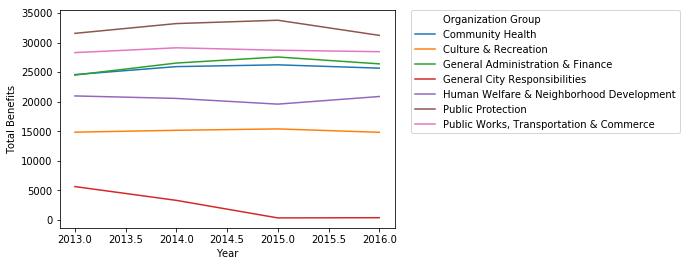

In [15]:
benefits_salary = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Salary','Total Benefits']]

g = sns.lineplot(x='Year',y='Total Benefits', hue='Organization Group', data=benefits_salary)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


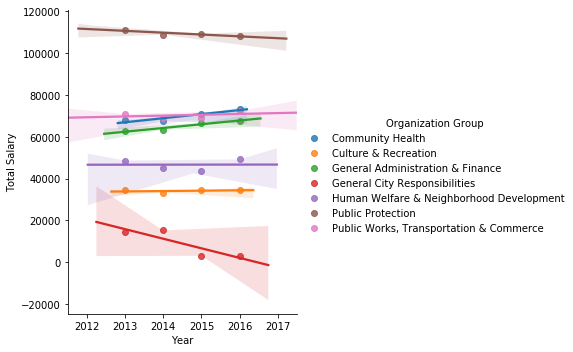

In [16]:
sns.lmplot(
    x='Year',
    y='Total Salary',
    hue='Organization Group',
    data=benefits_salary)

In [17]:
benefits_salary.groupby(['Organization Group']).corr()

Total Benefits  \
Organization Group                                                        
Community Health                         Total Benefits        1.000000   
                                         Total Salary          0.332780   
                                         Year                  0.641803   
Culture & Recreation                     Total Benefits        1.000000   
                                         Total Salary         -0.370298   
                                         Year                  0.075820   
General Administration & Finance         Total Benefits        1.000000   
                                         Total Salary          0.642453   
                                         Year                  0.679665   
General City Responsibilities            Total Benefits        1.000000   
                                         Total Salary          0.909604   
                                         Year                 -0.946114   
Human Welfare & Neighborhood Development Total Benefits        1.000000   
                                         Total Salary          0.895220   
                                         Year                 -0.257545   
Public Protection                        Total Benefits        1.000000   
                                         Total Salary         -0.081692   
                                         Year                 -0.048289   
Public Works, Transportation & Commerce  Total Benefits        1.000000   
                                         Total Salary         -0.715876   
                                         Year                  0.018757   

                                                         Total Salary  \
Organization Group                                                      
Community Health                         Total Benefits      0.332780   
                                         Total Salary        1.000000   
                                         Year                0.920139   
Culture & Recreation                     Total Benefits     -0.370298   
                                         Total Salary        1.000000   
                                         Year                0.381051   
General Administration & Finance         Total Benefits      0.642453   
                                         Total Salary        1.000000   
                                         Year                0.964006   
General City Responsibilities            Total Benefits      0.909604   
                                         Total Salary        1.000000   
                                         Year               -0.877441   
Human Welfare & Neighborhood Development Total Benefits      0.895220   
                                         Total Salary        1.000000   
                                         Year                0.007715   
Public Protection                        Total Benefits     -0.081692   
                                         Total Salary        1.000000   
                                         Year               -0.851807   
Public Works, Transportation & Commerce  Total Benefits     -0.715876   
                                         Total Salary        1.000000   
                                         Year                0.328410   

                                                             Year  
Organization Group                                                 
Community Health                         Total Benefits  0.641803  
                                         Total Salary    0.920139  
                                         Year            1.000000  
Culture & Recreation                     Total Benefits  0.075820  
                                         Total Salary    0.381051  
                                         Year            1.000000  
General Administration & Finance         Total Benefits  0.679665  
                                       

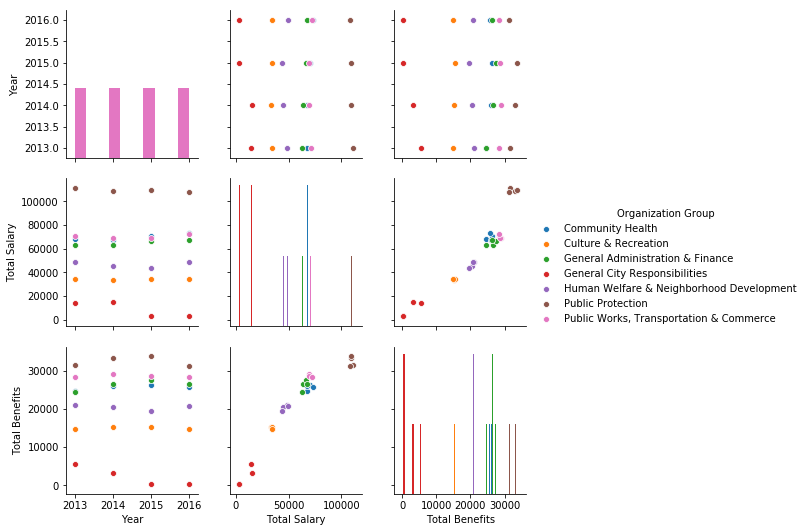

In [18]:
sns.pairplot(benefits_salary, hue='Organization Group', diag_kind='hist')

In [81]:
to_be_removed = [
    'Year Type',
    'Organization Group Code',
    'Department Code',
    'Union Code',
    'Job Family Code',
    'Job Code',
    'Job',
    'Employee Identifier',
#     'Retirement',
#     'Health/Dental',
#     'Other Benefits',
#     'Salaries',
#     'Overtime',
#     'Other Salaries',
#     'Total Salary',
#     'Total Benefits'
]
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year,Organization Group,Department,Union,Job Family,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [82]:
print(
    len(dataset['Job Family'].unique()),
    len(dataset['Department'].unique())
)

56 54


## Dropando as observações que possuem algum dado faltando

In [83]:
ds[ds.isnull().any(axis=1)].shape

(45, 14)

In [84]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [85]:
ds.head()

,Year,Organization Group,Department,Union,Job Family,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [86]:
extract_columns = [
    'Job Family',
    'Union',
    'Department',
    'Organization Group'
]
_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation,...,Department_Superior Court,Department_Treasurer/Tax Collector,Department_War Memorial,Organization Group_Community Health,Organization Group_Culture & Recreation,Organization Group_General Administration & Finance,Organization Group_General City Responsibilities,Organization Group_Human Welfare & Neighborhood Development,Organization Group_Public Protection,"Organization Group_Public Works, Transportation & Commerce"
0,2016,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65,...,0,0,0,0,0,0,0,0,1,0
1,2013,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05,...,0,0,0,0,1,0,0,0,0,0
2,2015,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64,...,0,0,0,1,0,0,0,0,0,0
3,2015,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50,...,0,0,0,1,0,0,0,0,0,0
4,2014,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64,...,0,0,0,0,1,0,0,0,0,0


In [87]:
_ds.shape

(291780, 198)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [89]:
regressor = Lasso()
linear_reg = LinearRegression()

X = _ds.drop(['Total Compensation'], axis=1)
y = _ds['Total Compensation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [90]:
regressor.fit(X_train,y_train)
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
predict = regressor.predict(X_test)
linear_predict = linear_reg.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))
print("Linear: ", mean_squared_error(y_test,linear_predict))

Lasso:  17.5442796533822
Linear:  2.677748644179498e-19
